# IMPORTANT DATA FOR 2024 (USE FOR COMPARISON)

**Source**: [WMATA Metrorail Ridership Summary](https://www.wmata.com/initiatives/ridership-portal/Metrorail-Ridership-Summary.cfm)

---

### ALL DATA FOR 2024 ONLY (Calc By Hand From Website Data)

#### Average (M-Sun) Daily Entries Per Day over the Whole Year
- **Total Average**: 394,582

#### Average Daily Entries Over All Stations by Day of the Week
- **Mondays**: 339,775
- **Tuesdays**: 423,610
- **Wednesdays**: 427,648
- **Thursdays**: 420,062
- **Fridays**: 362,359
- **Saturdays**: 270,954
- **Sundays**: 204,772

**Observation**:  
- **Highest**: Mid-week (Tuesday to Thursday)  
- **Lowest**: Weekends  
- **Assumption**: A large portion of people primarily use the metro for commuting.

---

#### Average Daily Entries of All Stations by Month in 2024
- **January**: 288,410
- **February**: 328,881
- **March**: 372,934
- **April**: 384,630
- **May**: 363,360
- **June**: 360,303
- **July**: 356,562
- **August**: 329,019
- **September**: 365,487
- **October**: 400,764
- **November**: 333,920
- **December**: 314,386

---

#### Average Daily Entries by Season
- **Spring (March, April, May)**: 373,641
- **Summer (June, July, August)**: 348,628
- **Fall (September, October, November)**: 366,723
- **Winter (December, January, February)**: 310,559

**Observation**:  
- **Least Busy**: Summer and Winter  
- **Most Busy**: Fall and Spring

---

#### Metro Information on Capacity
- Metro can only run a maximum of **26 trains per hour** safely/efficiently on each track.
- **120 max passengers** per car (section of train).
- Trains are **6-8 cars long**.

**Source**: [WMATA Corridor Data Maps](https://www.wmata.com/initiatives/plans/upload/BOS-Corridor-Data-Maps.pdf)


In [8]:
#Opening df for dataset on Metro Station Specs
import pandas as pd

stations_df = pd.read_csv("metro_stations.csv")
print(stations_df.head(5))



              X             Y              NAME  \
0 -8.561745e+06  4.696843e+06        Branch Ave   
1 -8.577575e+06  4.695085e+06     Braddock Road   
2 -8.578371e+06  4.694006e+06  King St-Old Town   
3 -8.579491e+06  4.693126e+06    Eisenhower Ave   
4 -8.579973e+06  4.692196e+06        Huntington   

                                  ADDRESS          LINE  \
0       4704 OLD SOPER ROAD, SUITLAND, MD         green   
1         700 N. WEST ST., ALEXANDRIA, VA  blue, yellow   
2        1900 KING STREET, ALEXANDRIA, VA  blue, yellow   
3  2400 EISENHOWER AVENUE, ALEXANDRIA, VA        yellow   
4  2701 HUNTINGTON AVENUE, ALEXANDRIA, VA        yellow   

                STATION_TYPE  NUMBER_OF_LINES  
0  ['Residential', 'Events']                1  
1    ['Residential', 'Jobs']                2  
2    ['Residential', 'Jobs']                2  
3    ['Residential', 'Jobs']                1  
4            ['Residential']                1  


In [9]:
#Opening df for dataset on Average daily entries by station by month for all days of the week in 2024
import pandas as pd

av_by_month_df = pd.read_csv("All_Months.csv")
print(av_by_month_df.head(5))

         Station Name AM Peak (Open-9:30am) Midday (9:30am-3pm)  \
0        Addison Road                580.00              287.00   
1           Anacostia              1,054.00            1,062.00   
2            Archives                145.00              725.00   
3  Arlington Cemetery                 52.00              234.00   
4             Ashburn                491.00              239.00   

  PM Peak (3pm-7pm) Evening (7pm-12am)  Late Night (12am-Close)    MONTH  \
0            149.00              78.00                      8.0  January   
1            907.00             332.00                     18.0  January   
2          2,167.00             429.00                     12.0  January   
3            222.00              39.00                      5.0  January   
4            139.00              39.00                      2.0  January   

   SEASON  Total Daily Entries  
0  Winter               1102.0  
1  Winter               3373.0  
2  Winter               3478.0  
3  Winte

In [10]:
#df for compiled average annual daily entries for all days, weekdays, and weekends in respective order
import pandas as pd

av_boardings_for_year = pd.read_csv("Annual_Station_Boarding_Compiled.csv")

print(av_boardings_for_year.head(5))

         Station Name AM Peak (Open-9:30am) Midday (9:30am-3pm)  \
0        Addison Road                678.00              358.00   
1           Anacostia              1,129.00            1,063.00   
2            Archives                153.00              994.00   
3  Arlington Cemetery                 42.00              568.00   
4             Ashburn                619.00              361.00   

  PM Peak (3pm-7pm) Evening (7pm-12am)  Late Night (12am-Close) Time of Week  \
0            199.00             107.00                      9.0   Whole Week   
1            988.00             314.00                     15.0   Whole Week   
2          2,721.00             697.00                     14.0   Whole Week   
3            394.00              33.00                      4.0   Whole Week   
4            210.00              68.00                      2.0   Whole Week   

   Total Daily Entries  
0               1351.0  
1               3509.0  
2               4579.0  
3               

Note: The names of the stations should match up for all dfs

Using this info let's try to explore some stuff using basic viz tools in python.

Here are my ideas so far:

# **1. Identifying Low and High Ridership Season**
**Goal:** Investigate which season has the **least and most** ridership for targeted advertising, metro resource/funding allocation.

### **Guiding Questions:**
1. Which season shows the least and most ridership overall?
   - Focus on seasonal ridership to identify trends in traffic, especially during the winter and summer months.
   - Look at the average daily entries by season and compare ridership trends across seasons.

2. How do ridership patterns vary by month within each season?
   - Determine if specific months contribute significantly to low ridership.

### **Initial Visualizations:**
1. **Seasonal Ridership Comparison (Bar Chart):**
   - **Y-Axis**: Total ridership per season (sum of ridership for each month within that season).
   - **X-Axis**: Seasons (Winter, Spring, Summer, Fall).
   - Helps visually compare the total ridership in each season.

2. **Monthly Ridership within Seasons (Line Graph):**
   - **Y-Axis**: Average ridership.
   - **X-Axis**: Months.
   - Helps identify monthly spikes or dips within each season.

---

# **2. Analyzing Commuter & College Student Usage (if we stil want these stakeholders)**
**Goal:** Find out which stations/lines are most used by **commuters** (workdays) and **college students** (evenings/weekends). **Note: the metro stations dataframe has station types for job and student which you can use to narrow station exploration**

### **Guiding Questions:**
1. What are the peak commute stations during weekdays over the whole year?
   - Focus on the morning and evening commute hours (6:00-9:30 AM and 3:00-7:00 PM).

2. Which stations are heavily used by college students?
   - Identify stations close to major universities (e.g., GW, UMD) and check ridership during evenings and weekends.
   -**Use the "STATION_TYPE" column to narrow this down**

### **Initial Visualizations:**
1. **Weekday Commuter Station Usage (Bar Plot):**
   - **Y-Axis**: Total ridership (AM & PM peak).
   - **X-Axis**: Station names.
   - This will show where commuters are most likely using the Metro during work hours.

2. **Evening/Weekend Student Usage (Bar Plot or Heatmap):**
   - **Y-Axis**: Stations.
   - **X-Axis**: Time of Day (e.g., Evening, Late Night).
   - Show which stations are heavily used during weekends and evenings, especially near university hubs.

---

# **3. Identifying Weekend Event Traffic**
**Goal:** Investigate which stations have high ridership during weekends, correlating with major events.

### **Guiding Questions:**
1. Which stations show the highest ridership on weekends?
   - Look at stations used for events or major tourist attractions (e.g., National Mall, stadiums, etc.).

2. Are there specific stations with increased ridership due to events?
   - Check if stations near stadiums or tourist spots show higher usage on weekends (e.g., Nationals Park, museums).

### **Initial Visualizations:**
1. **Weekend Ridership by Station (Bar Plot):**
   - **Y-Axis**: Total ridership for weekends.
   - **X-Axis**: Stations.
   - This will show which stations are most frequently used on weekends.

2. **Event-Related Traffic (Event-driven Ridership Map):**
   - Overlay the ridership patterns for stations near major venues (stadiums, concert halls) to identify if events influence ridership.
   - You could potentially map these stations or add event annotations.

---

# **Next Steps After Visualizations:**
- Review insights from the plots and adjust focus to answer specific questions.
- **Refine data scope**: Narrow focus to the top stations or lines that show the highest ridership trends.Or we can focus on the ones with the least and how to increase people using the metro on the weekends since those rates are lower than weekdays. This would increase metro usage and also increase local DC business. We can regroup and rediscuss other ideas after the initial viz are made.


In [11]:
#import statements for running viz

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\adrie\AppData\Local\Temp\ipykernel_47248\2670627592.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEASON', y='Average Daily Entries Across All Stations', data=seasonal_avg_ridership, palette="Blues_d")


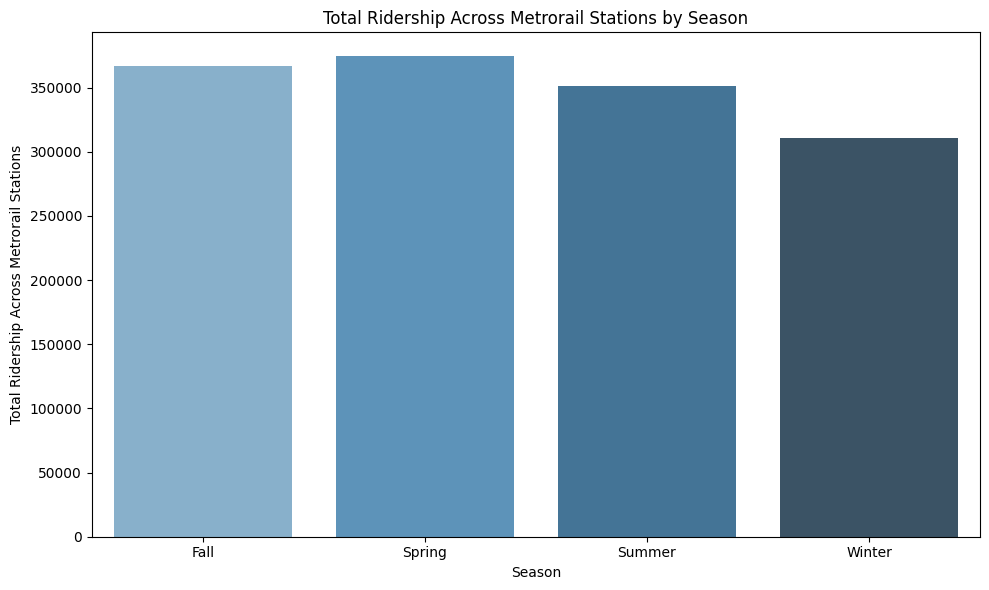

In [12]:
#Overall Ridership by Season Across Whole Metro

# group by 'SEASON' to find average daily entries for each season for one of 98 stations
seasonal_avg_ridership = av_by_month_df.groupby('SEASON')['Total Daily Entries'].mean().reset_index()

# multiply the average by 98 to get the total ridership for all stations
seasonal_avg_ridership['Average Daily Entries Across All Stations'] = seasonal_avg_ridership['Total Daily Entries'] * 98

import matplotlib.pyplot as plt
import seaborn as sns

#histogram of Average Daily Entries Across Stations By Season

plt.figure(figsize=(10, 6))

sns.barplot(x='SEASON', y='Average Daily Entries Across All Stations', data=seasonal_avg_ridership, palette="Blues_d")

plt.title('Total Ridership Across Metrorail Stations by Season')
plt.xlabel('Season')
plt.ylabel('Total Ridership Across Metrorail Stations')
plt.tight_layout()

# show the plot
plt.show()

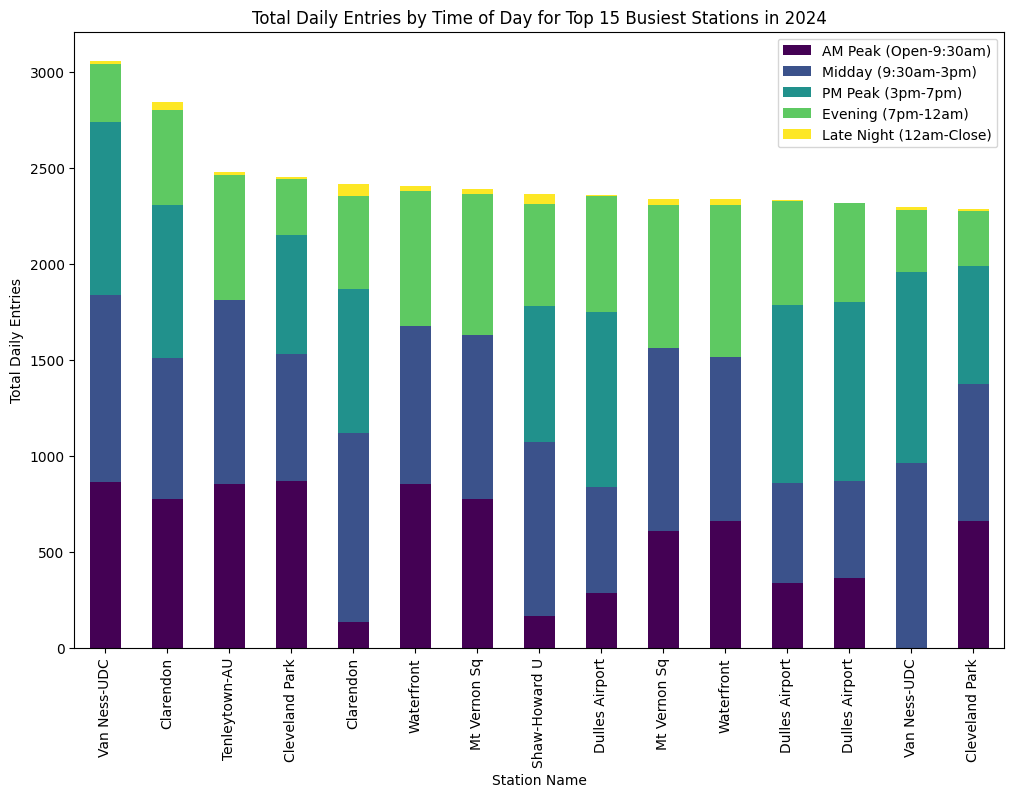

In [30]:
time_periods = ['Station Name', 'AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 
            'PM Peak (3pm-7pm)', 'Evening (7pm-12am)', 'Late Night (12am-Close)']

df_stacked = av_boardings_for_year[time_periods].set_index('Station Name')
df_stacked = df_stacked.apply(pd.to_numeric, errors='coerce') #had type errors
df_stacked['Total Daily Entries'] = df_stacked.sum(axis=1)

df_top_15 = df_stacked.sort_values(by='Total Daily Entries', ascending=False).head(15)
df_top_15 = df_top_15.drop(columns=['Total Daily Entries'])

df_top_15.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Total Daily Entries by Time of Day for Top 15 Busiest Stations in 2024')
plt.ylabel('Total Daily Entries')
plt.xlabel('Station Name')
plt.xticks(rotation=90)

plt.show()




In [ ]:
#utilizing metro stations specs df w/ the daily entries ones so I can display by Line in a heatmap

#merge the dfs on 'Station Name'
merged_df = av_by_month_df.merge(stations_df, left_on='Station Name', right_on='NAME', how='left')

user_input_line = input("Enter the line color (e.g., green, blue, yellow): ")

filtered_df = merged_df[merged_df['LINE'].str.contains(user_input_line, case=False, na=False)]

pivot = filtered_df.pivot_table(index='Station Name', columns='MONTH', values='Total Daily Entries', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title(f'Monthly Total Daily Entries by Station for {user_input_line.capitalize()} Line')
plt.ylabel('Station Name')
plt.xlabel('Month')
plt.show()


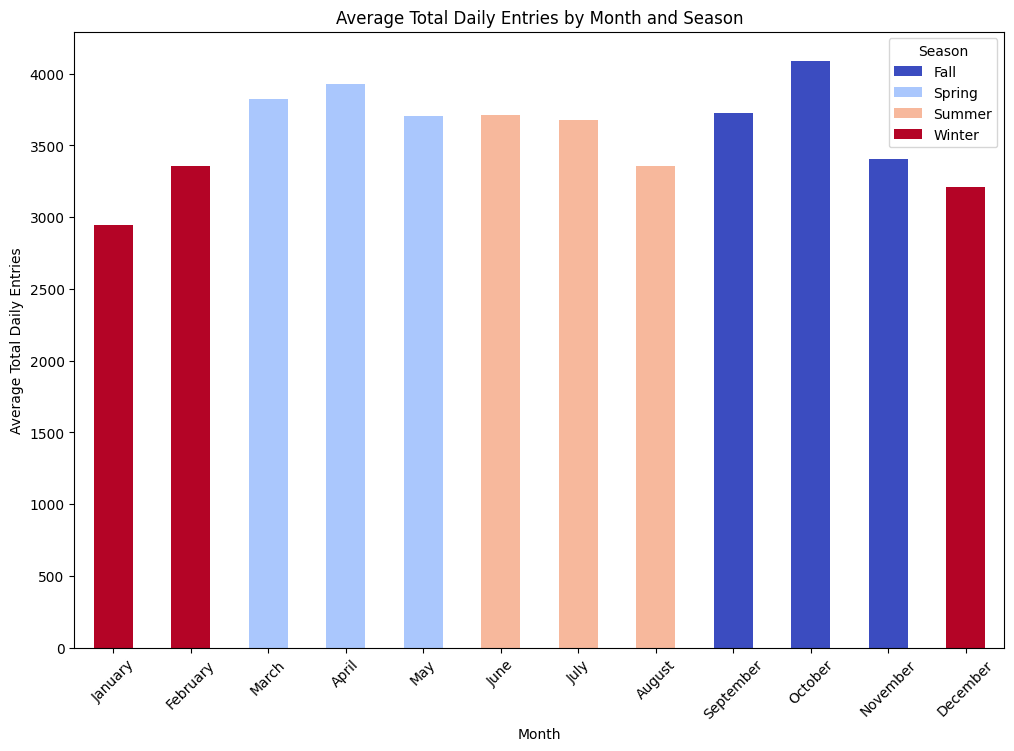

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

#group by season and month then calc avg daily entries
monthly_seasonal_entries = merged_df.groupby(['MONTH', 'SEASON'])['Total Daily Entries'].mean().unstack()

monthly_seasonal_entries.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Average Total Daily Entries by Month and Season')
plt.ylabel('Average Total Daily Entries')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Season')

plt.show()



In [ ]:
print(merged_df.head(5))

         Station Name AM Peak (Open-9:30am) Midday (9:30am-3pm)  \
0        Addison Road                580.00              287.00   
1           Anacostia              1,054.00            1,062.00   
2            Archives                145.00              725.00   
3  Arlington Cemetery                 52.00              234.00   
4             Ashburn                491.00              239.00   

  PM Peak (3pm-7pm) Evening (7pm-12am)  Late Night (12am-Close)    MONTH  \
0            149.00              78.00                      8.0  January   
1            907.00             332.00                     18.0  January   
2          2,167.00             429.00                     12.0  January   
3            222.00              39.00                      5.0  January   
4            139.00              39.00                      2.0  January   

   SEASON  Total Daily Entries             X             Y  \
0  Winter               1102.0 -8.559813e+06  4.705463e+06   
1  Winter       

C:\Users\mayap\AppData\Local\Temp\ipykernel_16404\1010039621.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()


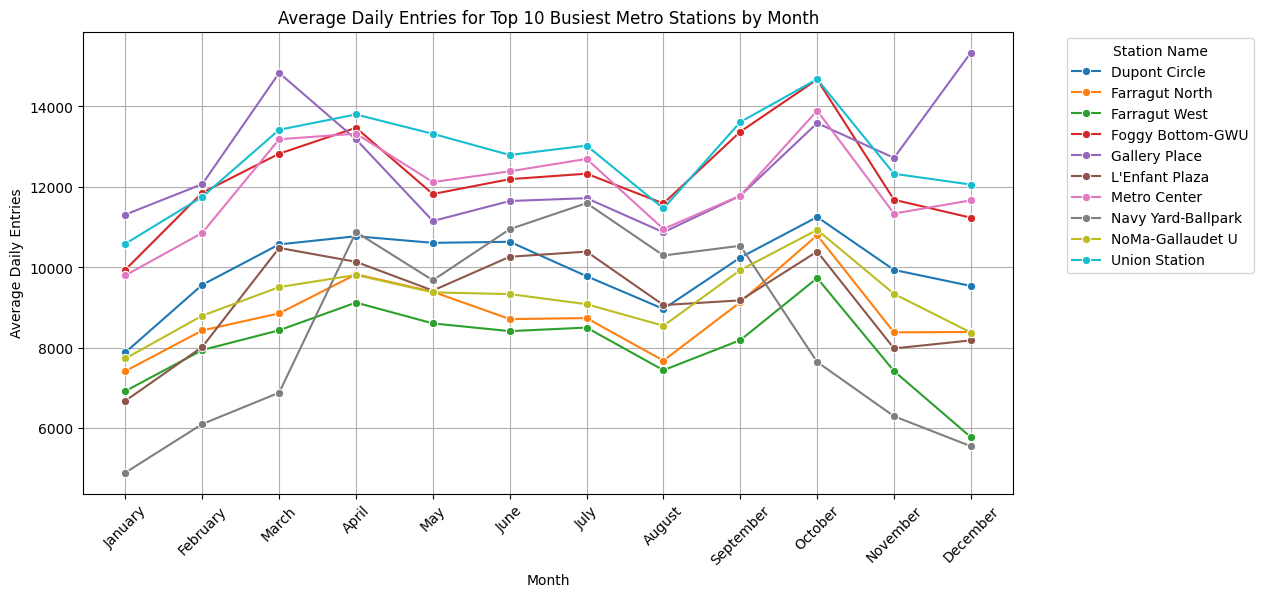

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

#top 10 busiest stations based on total daily entries
top_10_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().nlargest(10).index

filtered_df = merged_df[merged_df["Station Name"].isin(top_10_stations)]

#average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Top 10 Busiest Metro Stations by Month")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()

In January and February, the average daily entries are at the lowest levels for all of the 10 listed stations, which can be attributed to the cold weather that discourages many people from stepping out and riding the metro.

In March, the average daily entries for Gallery Place suddenly reaches its first peak, which can be attributed to the warming weather and cherry blossom season. There are also many attractions nearby such as the National Portrait Gallery, Smithsonian American Art Museum, Capital One Arena, Shakespeare Theater, Kogo Courtyard, and more. 

In April, the average daily entries for Union Station reaches its first peak, which can be attributed to the its many attractions nearby that people can enjoy in the warming weather, such as touring government buildings, visiting the Library of Congress, enjoying the blossomg trees at the National Japanese American Memorial. Some other popular destinations nearby are the National Air and Space Museum, the National Gallery of Art, and the U.S. Botanic Garden.

From May to August, the average daily entries are at the lowest levels for 9 out of 10 of the listed stations, which can be attributed to traveling out of state or out of the country by car or plane for vacation during the hot summer months.

In September, the average daily entries for 9 out of all of the 10 listed stationsdrastically increase and reach their peak in October. This may be attributed to popular events such as the Adams Morgan Day Festival, the DC State Fair, and the DC Jazz Fest in September, as well as the Oktoberfest, the Snallygaster, the Capital City Africa Cup, and the Fall Wine Festival in October. It is also the beginning of the Fall semester, so many commutes for college-going students begin this season, along with Halloween festivites.

In November and December, the average daily entres for all of the 10 listed stations decrease except for Gallery Place, which can be attributed to dropping temperatures discourage most metro riders, except for those interested in the Christmas festivities near Gallery Place, such as holiday markets, ice skating, and New Year's Eve celebrations.


In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

#top 10 busiest stations based on total daily entries
top_10_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().nlargest(10).index

filtered_df = merged_df[merged_df["Station Name"].isin(top_10_stations)]

#average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

monthly_ranks = monthly_avg_entries.groupby(["MONTH", "Station Name"])["Total Daily Entries"].sum().unstack().rank(ascending=False)
print("Ranked stations from highest to lowest ridership per month:")
print(monthly_ranks)

Ranked stations by highest & lowest ridership per month:
Station Name  Dupont Circle  Farragut North  Farragut West  Foggy Bottom-GWU  \
MONTH                                                                          
January                12.0            12.0           11.0              12.0   
February                9.0             8.0            8.0               7.0   
March                   5.0             5.0            5.0               4.0   
April                   2.0             2.0            2.0               2.0   
May                     4.0             3.0            3.0               8.0   
June                    3.0             7.0            6.0               6.0   
July                    8.0             6.0            4.0               5.0   
August                 11.0            11.0            9.0              10.0   
September               6.0             4.0            7.0               3.0   
October                 1.0             1.0            1.0     

In [ ]:
#merge the dfs on 'Station Name'
all_days_df = pd.read_csv("entries_exits_transformed_data.csv")

new_merged_df = all_days_df.merge(stations_df, left_on='Station Name', right_on='NAME', how='left')

print(new_merged_df.head(1))

new_merged_df.to_csv('everyday_2024_w_metro_station.csv', index=False)

   Station Name        Date    Month  Season  Entries (AM Peak (Open-9:30am))  \
0  Addison Road  2024-01-01  January  Winter                              100   

   Entries (Evening (7pm-12am))  Entries (Late Night (12am-Close))  \
0                            66                                  2   

   Entries (Midday (9:30am-3pm))  Entries (PM Peak (3pm-7pm))  \
0                            135                           95   

   Exits (AM Peak (Open-9:30am))  ...  Exits (PM Peak (3pm-7pm))  \
0                             45  ...                        169   

   Total Entries  Total Exits             X             Y          NAME  \
0            398          473 -8.559813e+06  4.705463e+06  Addison Road   

                                    ADDRESS          LINE     STATION_TYPE  \
0  100 ADDISON ROAD S., CAPITOL HEIGHTS, MD  blue, silver  ['Residential']   

  NUMBER_OF_LINES  
0               2  

[1 rows x 23 columns]


In [40]:
stations_df = pd.read_csv("stations.csv")
station_type_data = stations_df.groupby("Station Type")["Entries"].sum()
station_type_data.plot(kind="bar", stacked=True, colormap="plasma", figsize=(10, 5))
plt.title("Ridership by Station Type")
plt.ylabel("Total Entries")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'stations.csv'